In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

results_path = "C:/Users/kubil/Documents/STUDIUM/Master/4_Masterarbeit_Code/IOE-Algo-compare/imt-main/examples/results" 
ring_angles_kl = np.load(os.path.join(results_path, "Angles_IMU_RING_Knee_Left.npy"), allow_pickle=True)
ring_angles_kr = np.load(os.path.join(results_path, "Angles_IMU_RING_Knee_Right.npy"), allow_pickle=True)
cam_angles_kl = np.load(os.path.join(results_path, "Angles_CAM_Knee_Left.npy"), allow_pickle=True)
cam_angles_kr = np.load(os.path.join(results_path, "Angles_CAM_Knee_Right.npy"), allow_pickle=True)
folder_data_imu = "C:/Users/kubil/Documents/STUDIUM/Master/4_Masterarbeit_Code/IOE-Algo-compare/Daten/Dict_Frames/"
filenames_imu = [f.name for f in Path(folder_data_imu).rglob('*') if f.is_file()]  # all filnames in array
seq_filter = np.load(os.path.join(results_path, "Sequences_filter.npy"), allow_pickle=True)
seq_names = np.load(os.path.join(results_path, "Sequences_names.npy"), allow_pickle=True)

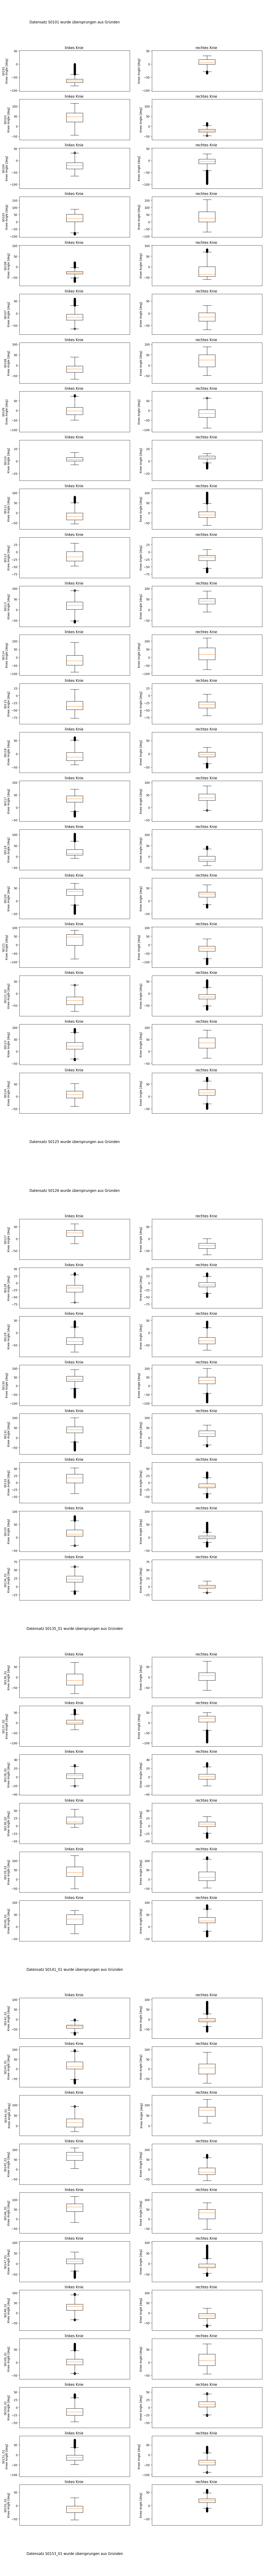

In [25]:
# Erstellen des Plots mit ix2 Subplots
fig, axes = plt.subplots(len(ring_angles_kl), 2, figsize=(15, 160))

for i in range(len(ring_angles_kl)):
    if seq_names[i] not in seq_filter:
        if len(cam_angles_kl[i]) > len(ring_angles_kl[i]):
            smoothed_arr = pd.Series(ring_angles_kl[i]).rolling(window=100, center=True).mean().to_numpy()
            smoothed_arr2 = pd.Series(cam_angles_kl[i][:len(ring_angles_kl[i])]).rolling(window=100, center=True, min_periods=1).mean().to_numpy()
            imu_to_camera2d_diff = smoothed_arr - smoothed_arr2
        else:
            smoothed_arr = pd.Series(ring_angles_kl[i][:len(cam_angles_kl[i])]).rolling(window=100, center=True).mean().to_numpy()
            smoothed_arr2 = pd.Series(cam_angles_kl[i]).rolling(window=100, center=True, min_periods=1).mean().to_numpy()
            imu_to_camera2d_diff = smoothed_arr - smoothed_arr2

        if len(cam_angles_kr[i]) > len(ring_angles_kr[i]):
            smoothed_arr3 = pd.Series(ring_angles_kr[i]).rolling(window=100, center=True).mean().to_numpy()
            smoothed_arr4 = pd.Series(cam_angles_kr[i][:len(ring_angles_kr[i])]).rolling(window=100, center=True, min_periods=1).mean().to_numpy()
            imu_to_camera2d_diff2 = smoothed_arr3 - smoothed_arr4
        else:
            smoothed_arr3 = pd.Series(ring_angles_kr[i][:len(cam_angles_kr[i])]).rolling(window=100, center=True).mean().to_numpy()
            smoothed_arr4 = pd.Series(cam_angles_kr[i]).rolling(window=100, center=True, min_periods=1).mean().to_numpy()
            imu_to_camera2d_diff2 = smoothed_arr3 - smoothed_arr4
        
        ylim_min=min(min(imu_to_camera2d_diff[~np.isnan(imu_to_camera2d_diff)]),min(imu_to_camera2d_diff2[~np.isnan(imu_to_camera2d_diff2)]))-20
        ylim_max=max(max(imu_to_camera2d_diff[~np.isnan(imu_to_camera2d_diff)]),max(imu_to_camera2d_diff2[~np.isnan(imu_to_camera2d_diff2)]))+20
        # Boxplots in einzelnen Subplots
        # Boxplot linkes Knie
        axes[i, 0].boxplot(imu_to_camera2d_diff[~np.isnan(imu_to_camera2d_diff)])
        axes[i, 0].set_title("linkes Knie ")
        axes[i, 0].set_ylabel(seq_names[i] + "\nKnee Angle [deg]")
        axes[i, 0].set_ylim(ylim_min,ylim_max)
        axes[i, 0].get_xaxis().set_visible(False)

        # Boxplot rechtes Knie
        axes[i, 1].boxplot(imu_to_camera2d_diff2[~np.isnan(imu_to_camera2d_diff2)])
        axes[i, 1].set_title("rechtes Knie ")
        axes[i, 1].set_ylabel("Knee Angle [deg]")
        axes[i, 1].set_ylim(ylim_min,ylim_max)
        axes[i, 1].get_xaxis().set_visible(False)

    else:
        axes[i,0].axis("off")
        axes[i,1].axis("off")
        axes[i,0].text(0.5,0.5 , "Datensatz " + seq_names[i] + " wurde übersprungen aus Gründen", ha="center", va="center", fontsize=12)
